<a href="https://colab.research.google.com/github/roshansadath/COMP6721_Winter2023_GroupN/blob/main/Transfer%20Learning/ResNet18D2_D1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
import os, time, random, torch, warnings, pandas
import numpy as np
from PIL import Image
import torch.nn as nn
import seaborn as sns
from tqdm import tqdm
from sklearn.manifold import TSNE
import torch.optim as optim
import matplotlib.pyplot as plt
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
from sklearn.metrics import precision_score, recall_score, f1_score

warnings.simplefilter("ignore")
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
data_path = "/content/drive/My Drive/Simple_Chest_XRay/"
#data_path = "/content/drive/My Drive/NIH_Chest_XRay/"
model_path = "/content/drive/My Drive/Harvard_Chest_XRay/"

sample_ratio = 1
batch_size = 96
num_epochs = 20

In [ ]:
# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)

In [ ]:
def save_metrics(loss, accuracy, model):
  np.save("{}{}_train_loss.npy".format(data_path, model), loss)
  np.save("{}{}_train_accuracy.npy".format(data_path, model), accuracy)

**DATA PREPROCESSING**


In [ ]:
%run "/content/drive/My Drive/Colab Notebooks/utils.ipynb"
dataset, train_loader, train_indices, test_loader, test_indices, val_loader, val_indices = data_preprocess(data_path, sample_ratio, batch_size)

 **LOAD THE RESNET18 WEIGHTS FROM DATASET 2 AND TRANSFER LEARN ON DATASET 1**


In [ ]:
# Define the pretrained ResNet18 model and perform Deep-Tuning
model = torch.hub.load('pytorch/vision:v0.9.0', 'resnet18', pretrained = False)
model.fc = nn.Linear(512, len(dataset.classes))

state_dict = torch.load("{}resnet18.pth".format(model_path))

state_dict['fc.weight'] = model.fc.weight
state_dict['fc.bias'] = model.fc.bias
model.load_state_dict(state_dict)

for encoderparams, classifierparams in zip(model.parameters(), model.fc.parameters()):
  encoderparams.requires_grad, classifierparams.requires_grad = True, True

model.to(device)

# Define loss function as CrossEntropy and optimizer as Adam Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.0001)

losses, accuracies, v_accuracies, v_losses = train_model(model, criterion, optimizer, "TL_ResNet18", num_epochs)

Downloading: "https://github.com/pytorch/vision/zipball/v0.9.0" to /root/.cache/torch/hub/v0.9.0.zip
Epoch 1/20: 100%|██████████| 43/43 [04:52<00:00,  6.80s/batch, Accuracy=0.93, Loss=0.173, Precision=0.911, Recall=0.913, F1 Score=0.912]


VALIDATION: Accuracy: 0.9130 | Loss: 0.2578 | Recall: 0.9400 | Precision: 0.8692 | F-score: 0.8938



Epoch 2/20: 100%|██████████| 43/43 [01:20<00:00,  1.87s/batch, Accuracy=0.933, Loss=0.17, Precision=0.914, Recall=0.913, F1 Score=0.914]


VALIDATION: Accuracy: 0.9556 | Loss: 0.1218 | Recall: 0.9542 | Precision: 0.9310 | F-score: 0.9418



Epoch 3/20: 100%|██████████| 43/43 [01:19<00:00,  1.86s/batch, Accuracy=0.96, Loss=0.103, Precision=0.927, Recall=0.925, F1 Score=0.926]


VALIDATION: Accuracy: 0.9625 | Loss: 0.1003 | Recall: 0.9470 | Precision: 0.9513 | F-score: 0.9491



Epoch 4/20: 100%|██████████| 43/43 [01:20<00:00,  1.86s/batch, Accuracy=0.969, Loss=0.0841, Precision=0.935, Recall=0.934, F1 Score=0.934]


VALIDATION: Accuracy: 0.9317 | Loss: 0.1973 | Recall: 0.9524 | Precision: 0.8916 | F-score: 0.9150



Epoch 5/20: 100%|██████████| 43/43 [01:25<00:00,  1.99s/batch, Accuracy=0.964, Loss=0.0929, Precision=0.939, Recall=0.938, F1 Score=0.939]


VALIDATION: Accuracy: 0.9642 | Loss: 0.1021 | Recall: 0.9622 | Precision: 0.9441 | F-score: 0.9526



Epoch 6/20: 100%|██████████| 43/43 [01:23<00:00,  1.95s/batch, Accuracy=0.971, Loss=0.0733, Precision=0.944, Recall=0.942, F1 Score=0.943]


VALIDATION: Accuracy: 0.9608 | Loss: 0.1132 | Recall: 0.9670 | Precision: 0.9344 | F-score: 0.9490



Epoch 7/20: 100%|██████████| 43/43 [01:20<00:00,  1.86s/batch, Accuracy=0.972, Loss=0.0754, Precision=0.947, Recall=0.945, F1 Score=0.946]


VALIDATION: Accuracy: 0.9625 | Loss: 0.1058 | Recall: 0.9540 | Precision: 0.9458 | F-score: 0.9498



Epoch 8/20: 100%|██████████| 43/43 [01:24<00:00,  1.97s/batch, Accuracy=0.983, Loss=0.0448, Precision=0.951, Recall=0.949, F1 Score=0.95]


VALIDATION: Accuracy: 0.9608 | Loss: 0.1229 | Recall: 0.9716 | Precision: 0.9321 | F-score: 0.9495



Epoch 9/20: 100%|██████████| 43/43 [01:26<00:00,  2.02s/batch, Accuracy=0.989, Loss=0.0306, Precision=0.955, Recall=0.953, F1 Score=0.954]


VALIDATION: Accuracy: 0.9625 | Loss: 0.1068 | Recall: 0.9587 | Precision: 0.9426 | F-score: 0.9503



Epoch 10/20: 100%|██████████| 43/43 [01:23<00:00,  1.94s/batch, Accuracy=0.988, Loss=0.0323, Precision=0.958, Recall=0.956, F1 Score=0.957]


VALIDATION: Accuracy: 0.9403 | Loss: 0.1840 | Recall: 0.8855 | Precision: 0.9530 | F-score: 0.9133



Epoch 11/20: 100%|██████████| 43/43 [01:25<00:00,  1.99s/batch, Accuracy=0.973, Loss=0.0699, Precision=0.959, Recall=0.957, F1 Score=0.958]


VALIDATION: Accuracy: 0.9642 | Loss: 0.0966 | Recall: 0.9669 | Precision: 0.9412 | F-score: 0.9531



Epoch 12/20: 100%|██████████| 43/43 [01:26<00:00,  2.01s/batch, Accuracy=0.992, Loss=0.0217, Precision=0.961, Recall=0.96, F1 Score=0.961]


VALIDATION: Accuracy: 0.9659 | Loss: 0.1133 | Recall: 0.9727 | Precision: 0.9414 | F-score: 0.9556



Epoch 13/20: 100%|██████████| 43/43 [01:25<00:00,  1.98s/batch, Accuracy=0.991, Loss=0.0244, Precision=0.963, Recall=0.962, F1 Score=0.963]


VALIDATION: Accuracy: 0.9471 | Loss: 0.1876 | Recall: 0.9626 | Precision: 0.9121 | F-score: 0.9330



Epoch 14/20: 100%|██████████| 43/43 [01:28<00:00,  2.07s/batch, Accuracy=0.992, Loss=0.0191, Precision=0.965, Recall=0.964, F1 Score=0.965]


VALIDATION: Accuracy: 0.9590 | Loss: 0.1334 | Recall: 0.9424 | Precision: 0.9466 | F-score: 0.9445



Epoch 15/20: 100%|██████████| 43/43 [01:25<00:00,  2.00s/batch, Accuracy=0.994, Loss=0.0206, Precision=0.967, Recall=0.966, F1 Score=0.967]


VALIDATION: Accuracy: 0.9573 | Loss: 0.1446 | Recall: 0.9647 | Precision: 0.9290 | F-score: 0.9448



Epoch 16/20: 100%|██████████| 43/43 [01:26<00:00,  2.01s/batch, Accuracy=0.994, Loss=0.015, Precision=0.969, Recall=0.968, F1 Score=0.968]


VALIDATION: Accuracy: 0.9590 | Loss: 0.1596 | Recall: 0.9565 | Precision: 0.9367 | F-score: 0.9460



Epoch 17/20: 100%|██████████| 43/43 [01:27<00:00,  2.03s/batch, Accuracy=0.975, Loss=0.0692, Precision=0.969, Recall=0.968, F1 Score=0.968]


VALIDATION: Accuracy: 0.9505 | Loss: 0.1461 | Recall: 0.9625 | Precision: 0.9177 | F-score: 0.9368



Epoch 18/20: 100%|██████████| 43/43 [01:29<00:00,  2.09s/batch, Accuracy=0.995, Loss=0.0155, Precision=0.97, Recall=0.969, F1 Score=0.97]


VALIDATION: Accuracy: 0.9710 | Loss: 0.1082 | Recall: 0.9667 | Precision: 0.9562 | F-score: 0.9613



Epoch 19/20: 100%|██████████| 43/43 [01:30<00:00,  2.10s/batch, Accuracy=0.999, Loss=0.00269, Precision=0.972, Recall=0.971, F1 Score=0.971]


VALIDATION: Accuracy: 0.9642 | Loss: 0.1347 | Recall: 0.9599 | Precision: 0.9456 | F-score: 0.9524



Epoch 20/20: 100%|██████████| 43/43 [01:30<00:00,  2.11s/batch, Accuracy=0.997, Loss=0.0086, Precision=0.973, Recall=0.972, F1 Score=0.972]


VALIDATION: Accuracy: 0.9659 | Loss: 0.1366 | Recall: 0.9633 | Precision: 0.9470 | F-score: 0.9548

[0.17287353803927388, 0.17019192884246964, 0.10305172951119967, 0.0840525866031036, 0.0928744430289992, 0.07334370334196684, 0.0753600406491137, 0.044767447408524105, 0.03060625104865713, 0.032271010568990274, 0.06985730390925761, 0.02167524292039912, 0.024430434197500062, 0.019107926411544674, 0.020591989881421524, 0.015023665529477884, 0.06922219625407675, 0.015507027118445892, 0.002691049198647712, 0.00859723969057764] [0.2578140286404525, 0.12179971760958942, 0.1002788312586959, 0.1973304081288621, 0.10209727950979011, 0.11323073857270004, 0.10579107071149065, 0.12289251046376017, 0.10675366868744939, 0.1839935075072095, 0.09655047175649287, 0.11334987897934462, 0.18761195644176862, 0.1334475341649361, 0.14461987519020106, 0.159579414060004, 0.14606288085618524, 0.10821418403155161, 0.13465395203628977, 0.13660641536815887]


**SAVE MODEL PARAMETERS**

In [ ]:
torch.save(model.state_dict(), "{}TL_resnet18.pth".format(data_path)) 

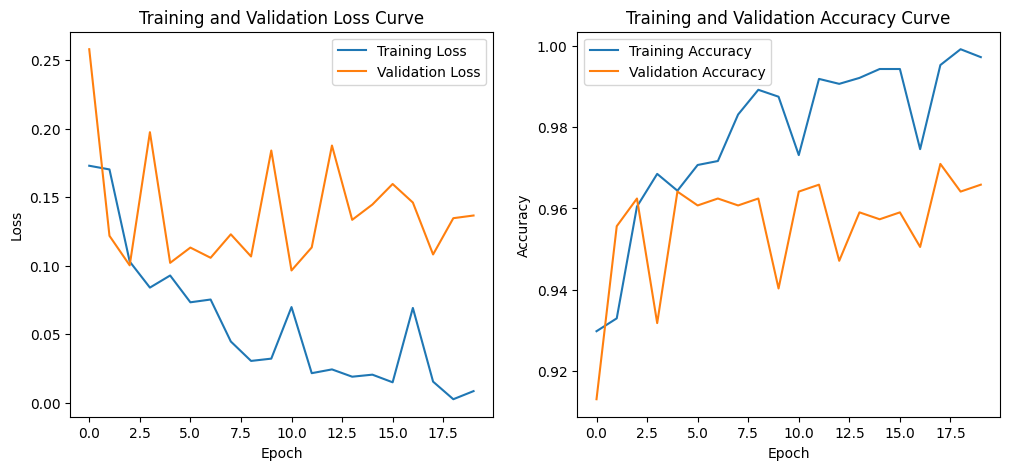

In [ ]:
#Plotting the Loss and Accuracy Curves
plot_model_curves(losses, accuracies, v_accuracies, v_losses)

**EVALUATE MODEL ON VALIDATION AND TEST SET**

TEST: Accuracy: 0.9641 | Loss: 0.1617 | Recall: 0.9484 | Precision: 0.9597 | F-score: 0.9538



<Figure size 800x800 with 0 Axes>

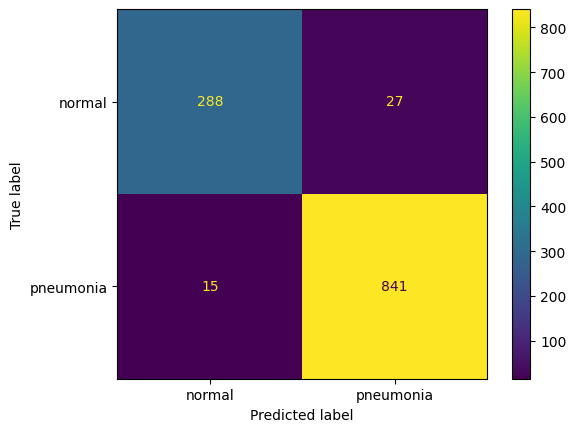

In [ ]:
#Evaluate Model on Test Set
evaluate_model(model, test_loader, test_indices, 'TEST', criterion, data_path, "ResNet18")

**PLOT TSNE AND WITHIN CLASS VARIANCE**

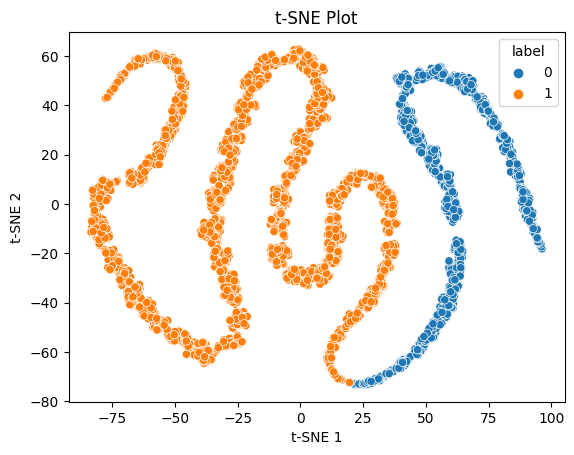

In [ ]:
#Obtain the TSNE Plot
plot_TSNE(train_loader, device, model)

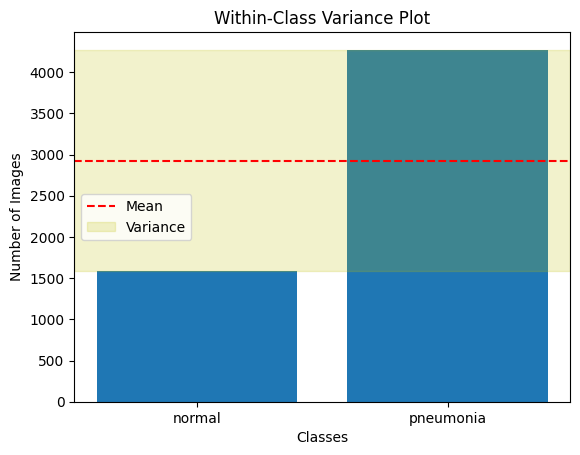

In [ ]:
#Plot the Within-Class Variance of the dataset
plot_within_class_variance(dataset)

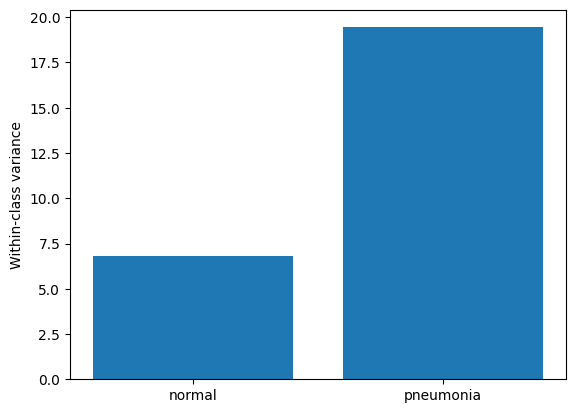

In [ ]:
def within_class_variance(dataset, model):
    # Set the model to evaluation mode
    model.eval()
    # Get the feature vectors and labels for the dataset
    features = []
    labels = []
    for images, targets in train_loader:
        with torch.no_grad():
          images = images.to(device)
          targets = targets.to(device)
          output = model(images)
          features.append(output.cpu().numpy()[0])
          labels.append(targets.cpu().numpy()[0])
    features = np.array(features)
    labels = np.array(labels)
    
    # Calculate the within-class variance for each class
    class_variances = []
    for c in np.unique(labels):
        class_features = features[labels == c]
        class_mean = np.mean(class_features, axis=0)
        class_variance = np.mean(np.sum((class_features - class_mean)**2, axis=1))
        class_variances.append(class_variance)
    
    return class_variances

# Define the dataset and model
# Calculate the within-class variance
class_variances = within_class_variance(dataset, model)

# Plot the within-class variances for each class
plt.bar(np.arange(len(class_variances)), class_variances)
plt.xticks(np.arange(len(class_variances)), dataset.classes)
plt.ylabel('Within-class variance')
plt.show()